# San Diego County Rental Dataset
---

In [4]:
# 1. Setup - San Diego Rental Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a San Diego beach/sunset style
sns.set_theme(style="whitegrid", palette="pastel")

# Custom San Diego Colors for plots
san_diego_colors = ['#00BFFF', '#FFD700', '#FFA07A', '#20B2AA', '#FF6347']

# Matplotlib default figure size and color tweaks
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=san_diego_colors)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14

# Display settings for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

# Load the dataset
file_path = 'san_diego_county_rentals_2025-04-25.csv'
df = pd.read_csv(file_path)

# Quick peek
df.head()


,Property,Address,City,State,ZipCode,Phone,Unit,Beds,Baths,Beds_Baths,SqFt,Price,PricePerSqFt,RentalType,HasWasherDryer,HasAirConditioning,HasPool,HasSpa,HasGym,HasEVCharging,StorageFee,AllowsDogs,AllowsCats,ListingURL
0,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1413,1,1.0,1 Bed / 1 Bath,658.0,3157.0,4.80,Apartment,True,True,True,False,True,False,NaN,False,False,https://www.apartments.com/radian-san-diego-ca...
1,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1513,1,1.0,1 Bed / 1 Bath,658.0,3182.0,4.84,Apartment,True,True,True,False,True,False,NaN,False,False,https://www.apartments.com/radian-san-diego-ca...
2,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1613,1,1.0,1 Bed / 1 Bath,658.0,3233.0,4.91,Apartment,True,True,True,False,True,False,NaN,False,False,https://www.apartments.com/radian-san-diego-ca...
3,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1210,1,1.0,1 Bed / 1 Bath,808.0,3331.0,4.12,Apartment,True,True,True,False,True,False,NaN,False,False,https://www.apartments.com/radian-san-diego-ca...
4,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1510,1,1.0,1 Bed / 1 Bath,808.0,3635.0,4.50,Apartment,True,True,True,False,True,False,NaN,False,False,https://www.apartments.com/radian-san-diego-ca...


Quick notes about what I see:
- Properties have unit-level granularity (`Unit 1413`, `Unit 1513`, etc.)
- Important numeric fields like `Price`, `SqFt`, `Beds`, `Baths` are **already numeric**
- **Amenities** (e.g., `HasWasherDryer`, `HasPool`, etc.) are neatly boolean (`True/False`)
- **City** is extracted and consistent ("San Diego" for this batch)

## Initial Exploration Block

---

In [3]:
# Overview of San Diego Rental Listings

# How many rows and columns?
print(f"Total listings: {df.shape[0]:,}")
print(f"Total columns: {df.shape[1]}")

# Data types
print("\nColumn Data Types:")
print(df.dtypes)

# Missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Quick Statistics for Numeric Columns
print("\nSummary Statistics:")
display(df.describe())

Total listings: 13,552
Total columns: 24

Column Data Types:
Property               object
Address                object
City                   object
State                  object
ZipCode                 int64
Phone                   int64
Unit                   object
Beds                    int64
Baths                 float64
Beds_Baths             object
SqFt                  float64
Price                 float64
PricePerSqFt          float64
RentalType             object
HasWasherDryer           bool
HasAirConditioning       bool
HasPool                  bool
HasSpa                   bool
HasGym                   bool
HasEVCharging            bool
StorageFee            float64
AllowsDogs               bool
AllowsCats               bool
ListingURL             object
dtype: object

Missing Values per Column:
Property                  0
Address                   0
City                      0
State                     0
ZipCode                   0
Phone                     0
Unit     

,ZipCode,Phone,Beds,Baths,SqFt,Price,PricePerSqFt,StorageFee
count,13552.000000,1.355200e+04,13552.000000,13552.000000,13474.000000,13542.000000,13464.000000,0.0
mean,92071.424513,7.119119e+09,1.485316,1.465577,869.207437,3054.473564,3.660604,NaN
std,68.757152,1.417823e+09,0.777567,0.572904,280.756333,1181.168540,1.005199,NaN
min,91901.000000,2.055283e+09,0.000000,0.500000,85.000000,850.000000,0.540000,NaN
25%,92029.000000,6.194933e+09,1.000000,1.000000,672.000000,2495.000000,3.040000,NaN
50%,92101.000000,6.199326e+09,1.000000,1.000000,829.000000,2875.000000,3.490000,NaN
75%,92115.000000,8.583024e+09,2.000000,2.000000,1030.000000,3395.000000,4.060000,NaN
max,92508.000000,9.492391e+09,4.000000,4.000000,3195.000000,19724.000000,17.710000,NaN


**Key Observations**

#### 1. General Info
- **Listings**: 13,552 (very healthy dataset)
- **Columns**: 24 total

#### 2. Missing Values
- **SqFt**: missing for 78 listings
- **Price**: missing for 10 listings
- **PricePerSqFt**: missing for 88 listings (makes sense — if either `Price` or `SqFt` is missing)
- **StorageFee**: missing for 100% (this is OK because Apartments.com doesn't expose it clearly most of the time)

**Conclusion**: Missing data is very minimal — easily manageable without deep concern!

---

#### 3. Quick Numeric Stats

| Field           | Minimum | Median | Maximum | Notes |
|-----------------|---------|--------|---------|-------|
| **Beds**         | 0       | 1      | 4       | 0 Beds probably = Studios |
| **Baths**        | 0.5     | 1.0    | 4.0     | Half-baths handled correctly |
| **SqFt**         | 85      | 829    | 3195    | Good spread: small studios to big homes |
| **Price**        | $850    | $2875  | $19,724 | Likely a luxury rental at the high end |
| **PricePerSqFt** | 0.54    | 3.49   | 17.71   | Extremely high $/sqft could be tiny luxury units |

---

### San Diego Insights Already Emerging:
- The **average** price is **~$3054**, matching expectations under $4000/month.
- The **majority** of listings are **1-2 bedrooms**.
- **Most properties** are ~800–1000 sqft — ideal for apartments and townhomes.

## Quick Missing Value Heatmap?

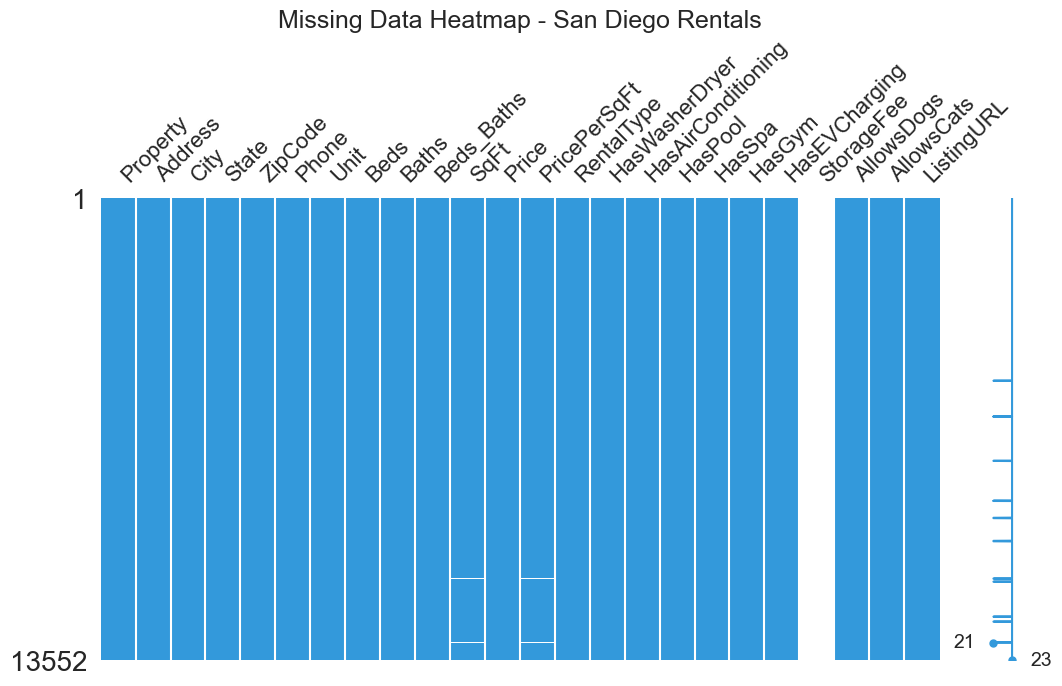

In [8]:
# 3. Visualizing Missing Data - ☀️ Heatmap View

import missingno as msno

# Light San Diego palette
msno.matrix(df, figsize=(12,6), color=(0.2, 0.6, 0.86))  # Ocean blue 🌊
plt.title('Missing Data Heatmap - San Diego Rentals', fontsize=18)
plt.show()

The **missing data heatmap** just a couple of light gaps where we expected: `SqFt`, `Price`, and `PricePerSqFt`.
---

# 🌴 Summary So Far:

| Checkpoint          | Status     | Notes                                    |
|---------------------|------------|------------------------------------------|
| Data Loaded         | ✅         | 13,552 listings, 23 columns               |
| Basic Info Checked  | ✅         | Minimal missing data (under 1% except StorageFee) |
| Visual Quality Check | ✅        | Confirmed with missingno heatmap         |

---

# 🎯 Next up: **Step 3 - Cleaning Minor Missing Values**

Here's what I propose:
- Drop listings with missing `Price` or `SqFt` (only ~80 listings out of 13,552 — <1%!)
- Recalculate `PricePerSqFt` just in case

---

### ✨ Data Cleaning Block (San Diego Styled):

```python
# 4. Data Cleaning - 🌞 Dealing with Missing Data

# Drop listings missing Price or SqFt
df_clean = df.dropna(subset=['Price', 'SqFt'])

# Confirm cleanup
print(f"Listings after cleanup: {df_clean.shape[0]:,}")

# Recalculate PricePerSqFt safely
df_clean['PricePerSqFt'] = df_clean.apply(
    lambda row: round(row['Price'] / row['SqFt'], 2)
    if pd.notnull(row['Price']) and pd.notnull(row['SqFt']) and row['SqFt'] > 0 else None,
    axis=1
)

# Sanity check - see if any PricePerSqFt are missing now
print(f"Remaining listings missing PricePerSqFt: {df_clean['PricePerSqFt'].isnull().sum()}")
```

---

✅ **If you’re good with this, after this cleanup we'll move straight into EXPLORATORY ANALYSIS:**
- 🌆 **Rental Prices** (distribution, top expensive/cheap areas)
- 🛏️ **Beds/Baths patterns**
- 🌊 **City/Zip trends**
- 🌞 **Amenity premiums** (pool? EV charging?)

---

Would you like to run this **cleaning block** next?  
(And I'll get the visual analysis lined up in full San Diego flavor after!) 🌴🎨🏄‍♂️